<a href="https://colab.research.google.com/github/jh941213/SequenceData-DL-/blob/main/Numpy%E1%84%85%E1%85%A9_FFN_%E1%84%86%E1%85%A1%E1%86%AB%E1%84%83%E1%85%B3%E1%86%AF%E1%84%80%E1%85%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
learning_rate = 0.001
bias = 0.7
epochs = 50
final_epoch_loss = []

In [5]:
random_generator = np.random.default_rng()

def generate_data(n_features, n_values):
    weights = random_generator.random((1, n_values))[0] # 튜플의 첫번째 요소를 출력
    features = random_generator.random((n_features, n_values)) # 피처 n_feature , n_values
    targets = np.random.choice([0,1], n_features) # 이진문제이기 때문에 0과 1만 있으면 된다.
    data = pd.DataFrame(features, columns=["n1", "n2", "n3", "n4"])
    data["target"] = targets
    return data, weights

In [6]:
def get_weighted_sum(features, weights, bias): #가중합계를 위한 함수
    return np.dot(features, weights) + bias # 특성 가중치와 바이어스를 전달 하고 있다. np.dot 행렬의 곱 피처와 가중치를 전달 편향

In [7]:
def sigmoid(x): #시그모이드 : 이진 분류 문제에서 0, 1로 출력하는 활성화 함수
    return 1/(1+np.exp(-x)) # 1+e -z 

In [8]:
def cross_entropy_loss(target, prediction): #loss
    return -(target*np.log10(prediction) + (1-target)*np.log10(1-prediction))

    # 왜 마이너스를 가지고 있을까? 로그가 발생하면 줄여야 하기 때문이다

In [9]:
def update_weights(weights, learning_rate, target, prediction, feature): #각 반복 후 loss bias 의 가중치를 업데이트한다.
    new_weights = []
    for input_x, old_weight in zip(feature, weights):
        new_weight = old_weight + learning_rate*(target - prediction)*input_x
        new_weights.append(new_weight)
    return new_weights

def update_bias(bias, learning_rate, target, prediction): # bias 도 업데이트 해준다
    return bias + learning_rate*(target-prediction) #타겟 - 예측

In [10]:
data, weights = generate_data(500,4)

def train_model(data, weights, bias, learning_rate, epochs):
    for epoch in range(epochs):
        individual_loss = []
        for i in range(0, len(data)):
            feature = data.loc[i][:-1]
            # ["n1", "n2", "n3", "n4"] ... features
            target = data.loc[i][-1] #.... "target"
            w_sum = get_weighted_sum(features=feature, weights=weights, bias=bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy_loss(target, prediction)
            individual_loss.append(loss)
            weights = update_weights(weights, learning_rate, target, prediction, feature)
            bias = update_bias(bias, learning_rate, target, prediction)
        average_loss = sum(individual_loss)/len(individual_loss)
        final_epoch_loss.append(average_loss)
        print(f"******************************** Epoch: {epoch} , Loss:  {average_loss}")

In [11]:
weights

array([0.41162015, 0.54153735, 0.13558835, 0.82986385])

In [12]:
train_model(data, weights, bias, learning_rate, epochs)

******************************** Epoch: 0 , Loss:  0.42581056487035407
******************************** Epoch: 1 , Loss:  0.38373838117170506
******************************** Epoch: 2 , Loss:  0.35417432961748135
******************************** Epoch: 3 , Loss:  0.3344180322284936
******************************** Epoch: 4 , Loss:  0.3217036740243281
******************************** Epoch: 5 , Loss:  0.3137279729888997
******************************** Epoch: 6 , Loss:  0.3088028307209944
******************************** Epoch: 7 , Loss:  0.30578616998501473
******************************** Epoch: 8 , Loss:  0.30394257216128384
******************************** Epoch: 9 , Loss:  0.3028124434233139
******************************** Epoch: 10 , Loss:  0.3021136383762492
******************************** Epoch: 11 , Loss:  0.3016747502154837
******************************** Epoch: 12 , Loss:  0.30139227755299697
******************************** Epoch: 13 , Loss:  0.30120394101560477
*********

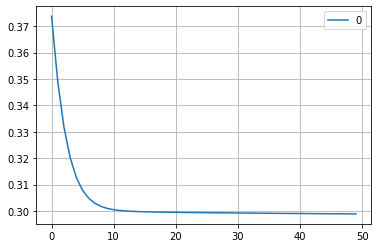

In [ ]:
df = pd.DataFrame(final_epoch_loss)
df_plot = df.plot(kind="line", grid=True).get_figure()